<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.

In [33]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

### **Task 1 - Read the dataset in the csv file from the URL**


In [35]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [36]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **Task 2 - Descriptive Statistics and Visualizations**

### 1) Boxplot for Median Value of Owner-Occupied Homes (MEDV)

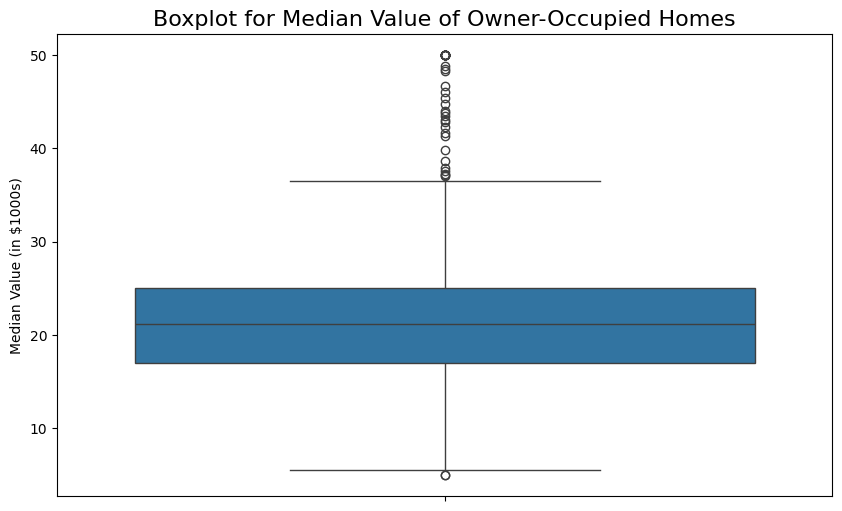

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-Occupied Homes', fontsize=16)
plt.ylabel('Median Value (in $1000s)')
plt.show()

### 2) Bar Plot for Charles River Variable (CHAS):

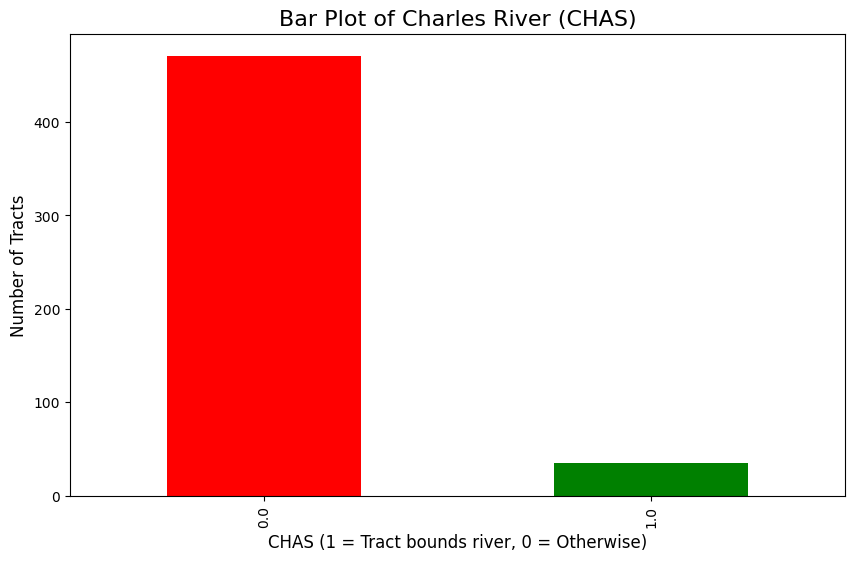

In [11]:
plt.figure(figsize=(10, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Bar Plot of Charles River (CHAS)', fontsize=16)
plt.xlabel('CHAS (1 = Tract bounds river, 0 = Otherwise)', fontsize = 12)
plt.ylabel('Number of Tracts', fontsize = 12)
plt.show()

### 3) Boxplot for MEDV vs AGE (Discretize AGE into three groups: <=35, 35-70, >70)

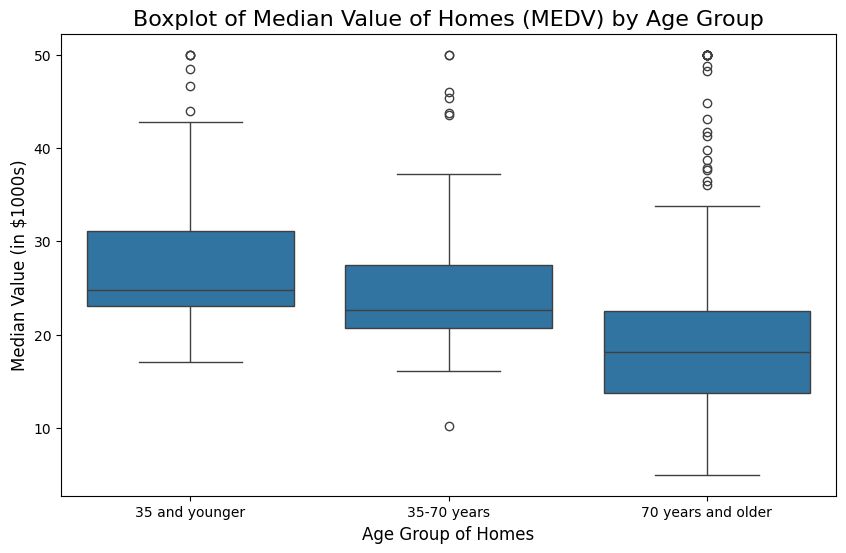

In [13]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes (MEDV) by Age Group', fontsize=16)
plt.xlabel('Age Group of Homes', fontsize=12)
plt.ylabel('Median Value (in $1000s)', fontsize=12)
plt.show()

### 4) Scatter Plot for Nitric Oxide Concentration (NOX) vs Non-Retail Business Acres (INDUS):

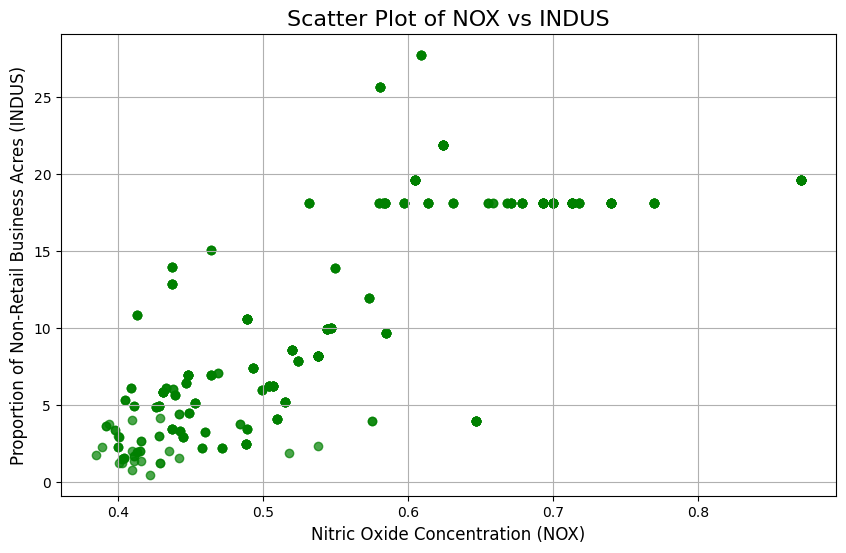

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.7, color='green')
plt.title('Scatter Plot of NOX vs INDUS', fontsize=16)
plt.xlabel('Nitric Oxide Concentration (NOX)', fontsize=12)
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)', fontsize=12)
plt.grid(True)
plt.show()

### Summary of the scatter plot

The relationship between NOX and INDUS appears to be non-linear. There is a positive correlation at lower levels of NOX. At higher levels of NOX, there is more scattered and horizontal distribution which concludes that their relationship has weakened.

### 5) Histogram for Pupil-to-Teacher Ratio:

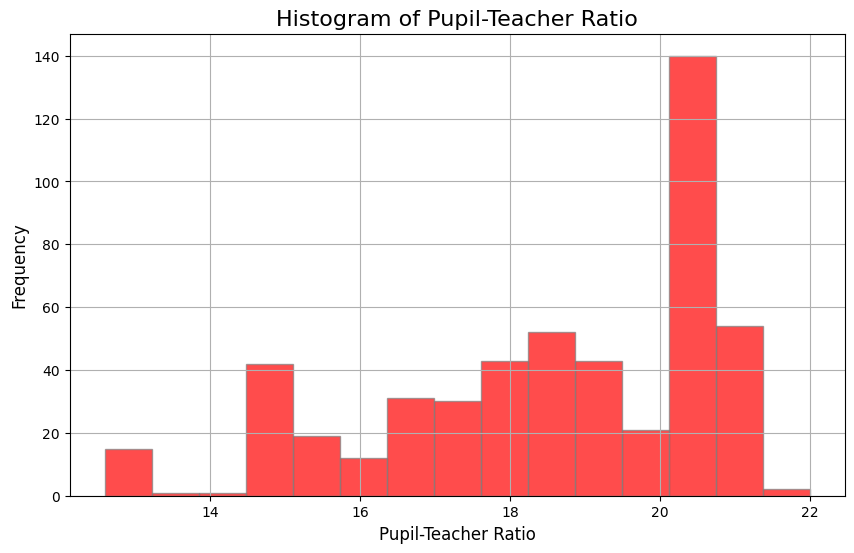

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='red', edgecolor='grey', alpha=0.7)
plt.title('Histogram of Pupil-Teacher Ratio', fontsize=16)
plt.xlabel('Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

## **Task 3 - Statistical Tests**

#### 1) T-Test: Is there a significant difference in median value of houses bounded by the Charles River?

In [26]:
# Separate groups based on CHAS
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_non_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(medv_river, medv_non_river)

# Results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("As p-value is less than 0.05, There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("As p-value is greater than or equal to 0.05, There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.9964, P-value: 0.0001
As p-value is less than 0.05, There is a significant difference in the median value of houses bounded by the Charles River.


#### 2) ANOVA: Is there a difference in median house values (MEDV) for different AGE groups?

In [28]:
# Perform ANOVA
f_stat, p_val = stats.f_oneway(boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV'],
                               boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV'],
                               boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'])

# Results
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("As p-value is less than 0.05, There is a significant difference in median house values for different AGE groups.")
else:
    print("As p-value is greater than or equal to 0.05, There is no significant difference in median house values for different AGE groups.")

F-statistic: 36.4076, P-value: 0.0000
As p-value is less than 0.05, There is a significant difference in median house values for different AGE groups.


#### 3) Pearson Correlation: is there no relationship between NOX and INDUS?

In [29]:
# Pearson correlation test
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Results
print(f"Pearson correlation coefficient: {corr:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("As p-value is less than 0.05, There is a significant relationship between NOX and INDUS.")
else:
    print("As p-value is greater than or equal to 0.05, There is no significant relationship between NOX and INDUS.")

Pearson correlation coefficient: 0.7637, P-value: 0.0000
As p-value is less than 0.05, There is a significant relationship between NOX and INDUS.


#### 4) Regression Analysis: Impact of weighted distance (DIS) to Boston centers on median house value (MEDV)

In [38]:
# Regression model
X = boston_df['DIS']
X = sm.add_constant(X)  # Add constant for intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        23:40:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### Summary of the above model
DIS is significantly important in predicting median house value but the R-squared value informs us that other factors also play a necessary role in this. The positive coefficient indicates that home prices increase as the distance to employment centers increases, which might point to preferences for homes further away from city centers.